In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

# Machine Learning #1: Linear Regression in the beginning

This tutorial series is for absolute beginners in machine learning algorithms, for those who want to review/practice the fundamentals of machine learning and how to build them from scratch.

## What is Machine Learning?

"Machine Learning is the science (and art) of programming computers so they can <i>learn from data </i>"
- Aurelion Geron, 2017

## Type of Machine Learning Systems

<br>reference 1: [Hands-On Machine Learning with Scikit-Learn and Tensorflow](http://shop.oreilly.com/product/0636920052289.do)

reference 2: [Machine Learning, Stanford University by Andrew Ng](https://www.coursera.org/learn/machine-learning)

<br>There are a lot of different types of Machine Learning Systems and usually it is best to classify them in broad categories based on:

    * Whether or not they are trained with human supervision (supervised, unsupervised, 
        semisupervised, and Reinforcement Learning  
    
    * Whether or not they can learn incrementally on the fly (online versus batch learning)
    
    * Whether they work by simply comparing new data points to know data points or instead 
        detect patterns in the training data and build a predictive model, much like scientists
        do (instance-based versus model-based learning)

<i> Let's look at the very <b> first criteria </b> a bit more closely... </i>

## Supervised/Unsupervised Learning

Machine Learning systems are usually classified according to the amount and type of supervision they
get during training. There are four major categories: supervised learning, unsupervised learning,
semisupervised learning, and Reinforcement Learning.

<i> Let us tackle <b> Supervised Learning </b> for now <i>



## Supervised Learning

In supervised learning, the training data you feed to the algorithm includes the desired solutions,
called <i>labels</i>

* A typical supervised learning task is <b>classification</b>. The spam filter is a good example of this: 
it is trained with many examples emails along with their <i>class</i> (spam or ham), and it must learn how to
classify new emails.
* Another typical task is to predict a <i>target</i> numeric value, such as the price of a car, given a set
of <i>features</i> (mileage, age, brand, etc.) called <i>predictors</i>. This sort of task is called <b>regression</b>.
To train the system, you need to give it many examples of cars, including both their predictors and
their labels (i.e., their prices)
   
<i>Let's try <b>Regression!</b><i>

## Linear Regression: Univariate

Let's start with a very simple task of <i>linear regression</i> using a sample dataset called Portland 
Housing Prices, wherein we are given some <i>features</i> of a house (i.e. area, no. of rooms, etc) and
predict the <i>target</i> price.

To make things much simpler. Let us use only one <i>feature</i> or in this case one variable, also known as 
<b>univariate linear regression</b>. That is we are only gonna use the 'Area' of a given house to train a
linear model

<i>Let's <b>get</b> the data and <b>examine</b> it!</i>

In [57]:
import numpy as np  
import pandas as pd 

data = pd.read_csv('dataset/oregon.csv')
data.head()

,2104,3,399900
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


The data itself does not contain feature names or labels, let's set that up first.
According to the source the first column is the <b>size</b> of the house in sq.ft. followed by 
the no. of <b>bedrooms</b> and lastly the <b>price</b>.

In [58]:
data.columns =(['luas','jmltt','harga'])
data.head()

,luas,jmltt,harga
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


Let us remove the 'Bedroom' feature since we are doing <b>univariate linear regression</b>

In [59]:
data.drop(['jmltt'], axis=1, inplace=True)
data.head()

,luas,harga
0,1600,329900
1,2400,369000
2,1416,232000
3,3000,539900
4,1985,299900


In [60]:
#data = data.sample(frac=1)
#data.head()

Now that looks much <b>simpler</b>!
Let's <b>plot</b> our data and draw some <b>insights</b> of how a <b>linear model</b> could fit.

In [61]:
# necessary dependencies for plotting
import matplotlib.pyplot as plt #python library for plot and graphs
%matplotlib inline

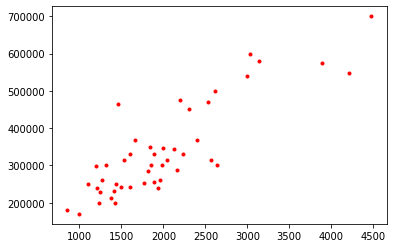

<Figure size 1440x1440 with 0 Axes>

In [62]:
# necessary dependencies for plotting
import matplotlib.pyplot as plt #python library for plot and graphs
%matplotlib inline

plt.plot(data['luas'], data['harga'], 'r.')
plt.figure(figsize=(20,20))
plt.show()

From the plot results we could see that there is a <b>high correlation</b> between Housing <b>Area</b>
and Housing <b>Price</b> (obviously) and therefore we could use a <b>line</b> (linear model) to fit this data.

Test the correlation of data with data.corr(). corr(X,Y) = cov(X,Y)/pXpY = E[(X-uX)(Y-uY)]/pXpY

In [63]:
# another way to test the correlation
data.corr()

,luas,harga
luas,1.000000,0.855928
harga,0.855928,1.000000


## Linear Model

The idea of linear regression is to fit a line to a set of points.
So let's use the line function given by:
$$f(x) = y = mx + b$$
where <b>m</b> is the slope and <b>b</b> is our <b>y</b> intercept, or for a more general form (multiple variables)
$$h(x) = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$$
such that for a single variable where <b>n = 1</b>, 
$$h(x) = \theta_0 + \theta_1 x_1$$
$$ when \space x_0 = 1 $$
where theta is our <b>parameters</b> (slope and intercept) and h(x) is our <b>hypothesis</b> or predicted value


In [64]:
class LinearModel():
    
    def __init__(self, features, target):
        self.X = features
        self.y = target
    
    def GradDesc(self, parameters, learningRate, cost):
        self.a = learningRate
        self.c = cost
        self.p = parameters
        return self.a, self.Cost(self.c), self.p
    
    def Cost(self,c):
        if c =='RMSE':
            return self.y
        elif c == 'MSE':
            return self.X
            
            
X=1
y=0
a = LinearModel(5,4)
print(a.GradDesc(2,0.01,'MSE'))
print(a.Cost('RMSE'))

(0.01, 5, 2)
4


## Matrix Math

As it turns, using Matrices and Vectors is actually very convenient in these type of problems
(talking about the obvious)
To demonstrate that let's have an example:

In [65]:
# given a matrix A (3x2) and a matrix B (1x2)
A = np.array([[1,2],
              [1,3],
              [1,4]])
B = np.array([[2],[3]])

print('A =')
print(A,'\nsize =',A.shape)
print('\nB =')
print(B,'\nsize =',B.shape)

A =
[[1 2]
 [1 3]
 [1 4]] 
size = (3, 2)

B =
[[2]
 [3]] 
size = (2, 1)


Suppose A is our feature matrix <b><i>X</i></b> and B as our parameter matrix <b><i>theta</i></b>, that is,
$$X = [\ 1\ 2\ ] \ \ \ \theta = [\ 2\ 3\ ]$$ 
$$[\ 1\ 3\ ] \ \ \ \ \ \ \ \ \ \ \ \ $$
$$[\ 1\ 4\ ] \ \ \ \ \ \ \ \ \ \ \ \ $$
Remember that we have our linear model
$$h(x) = \theta_0 x_0 + \theta_1 x_1$$
We know that
$$X_0 = [\ 1\ ] \ \ \ X_1 = [\ 2\ ] \ \ \ \theta^T = [\ 2\ ] $$ 
$$\ \ \ \ \ \ \ \ \ [\ 1\ ]\ \ \ \ \ \ \ \ \ \ \ \ [\ 3\ ]\ \ \ \ \ \ \ \ \ \ \ \ \ [\ 3\ ]$$
$$[\ 1\ ] \ \ \ \ \ \ \ \ \ \ \ \ [\ 4\ ]\ \ \ \ \ \ \ \ \ \ \ $$
then we can actually use matrix dot product to do the multiplication and addition at the same time
(and faster)
$$H=[\ \theta_0 X_0^0+\theta_1 X_1^0\ ]=[\ \theta_0+\theta_1X_1^0\ ]=[\ 2+3(2)\ ]=[\ \ 8\ \ ]\ \ \ \ \ \ \ \ $$
$$[\ \theta_0 X_0^1+\theta_1 X_1^1\ ]\ \ \ \ \ [\ \theta_0+\theta_1 X_1^1\ ]\ \ \ \ \ [\ 2+3(3)\ ]\ \ \ \ \ [\ 11\ ]$$
$$[\ \theta_0 X_0^2+\theta_1 X_1^2\ ]\ \ \ \ \ [\ \theta_0+\theta_1 X_1^2\ ]\ \ \ \ \ [\ 2+3(4)\ ]\ \ \ \ \ [\ 14\ ]$$

$$ can\ be\ as\ simple\ as $$

$$ H = X \ dot \ \theta $$
<i>Yes, that is the power of <b>Matrices</b>!</i>

In [66]:
# let's try it
H = A.dot(B)
print(H)

[[ 8]
 [11]
 [14]]


Wow! Worked like a charm ;)

## Featuring Scaling & Normalization

Let's go back to our data and store it as <b>X</b> (features) and <b>y</b> (target) matrices first
also <b>m</b> (number of sample data also called 'training samples')

In [67]:
X = np.array(data.drop('harga',axis=1))
y = np.array(data.harga)
m = len(data)

print(X.shape)
print(y.shape)
print(m)

(46, 1)
(46,)
46


Looking at the <b>y</b> variable, it is shaped as a flattened array <i>(47, )</i>
Let's reshape it to a matrix of form <i>(47, 1)</i>

In [68]:
y = y.reshape((m,1))
print(y.shape)

(46, 1)


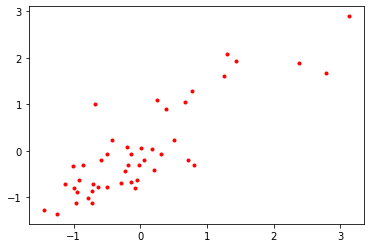

In [90]:
def normscaler(Z, normal=False, scale='max'): 
    Zn = np.zeros(Z.shape)
    for col in range(Zn.shape[1]):
        std = Z[:,col].std()
        clm = Z[:,col]
        mn = Z[:,col].mean()
        mx = Z[:,col].max()
        nrm = 0
        sclr = 1
        if normal:
            nrm = mn
        if scale =='max':
            sclr = mx
        elif scale == 'std':
            sclr = std
        Zn[:,col] = (clm-nrm)/sclr
        
    return Zn
    
Xn = normscaler(X, normal=True, scale='std')
yn = normscaler(y, normal=True, scale='std')
plt.plot(Xn, yn, 'r.')
plt.show()

In [71]:
# parameter initialization (choose any theta at initial)
theta = np.array([0.9,-1])

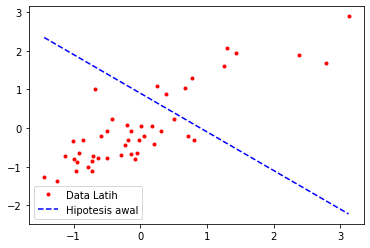

In [92]:
lineX = np.linspace(Xn.min(), Xn.max(), 100)
liney = [theta[0] + theta[1]*xx for xx in lineX]

plt.plot(Xn,yn,'r.', label='Data Latih')
plt.plot(lineX,liney,'b--', label='Hipotesis awal')
plt.legend()
plt.show()

In [73]:
def cost_function(X, y, theta, deriv=False):
    z = np.ones((len(X),1))
    X = np.append(z, X, axis=1)
    
    if deriv:
        loss     = X.dot(theta)-y
        gradient = X.T.dot(loss)/len(X)
        return gradient, loss
        
    else:
        h = X.dot(theta)
        j = (h-y.flatten())
        J = j.dot(j)/2/(len(X))
        return J
    
cost_function(Xn, yn, theta)

2.2609282529623553

In [93]:
def GradDescent(features, target, param, learnRate=0.01, multiple=1, batch=len(X), log=False):

    iterations = batch*len(features)
    epochs     = iterations*multiple
    y          = target.flatten()
    t          = param
    b          = batch
    a          = learnRate
    
    theta_history  = np.zeros((param.shape[0],epochs)).T
    cost_history   = [0]*epochs
    
    for ix in range(epochs):
        
        i    = epochs%len(X)
        cost = cost_function(features[i:i+b], y[i:i+b], t)

        cost_history[ix]   = cost
        theta_history[ix]  = t

        g, l = cost_function(features[i:i+b], y[i:i+b], t, deriv=True)
        t    = t-a*g
        
        if log:
            if ix%250==0:
                print("iteration :", ix+1)
                #print("\tloss     = ", l)
                print("\tgradient = ", g)
                print("\trate     = ", a*g)
                print("\ttheta    = ", t)
                print("\tcost     = ", cost)
            
    return cost_history, theta_history

alpha = 0.01
mul = 10
bat = 8
ch, th = GradDescent(Xn,yn,theta,alpha,mul,bat,log=False)

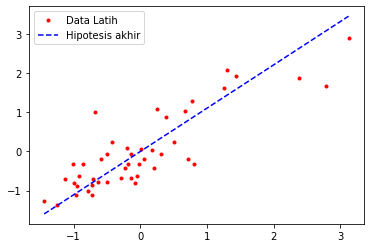

In [94]:
lineX = np.linspace(Xn.min(), Xn.max(), 100)
liney = [th[-1,0] + th[-1,1]*xx for xx in lineX]

plt.plot(Xn,yn,'r.', label='Data Latih')
plt.plot(lineX,liney,'b--', label='Hipotesis akhir')
plt.legend()
plt.show()

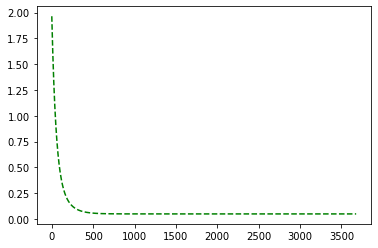

In [76]:
plt.plot(ch,'g--')
plt.show()

[9.00000000e-01 8.86872266e-01 8.73900415e-01 ... 9.22330515e-05
 9.22332512e-05 9.22334501e-05]


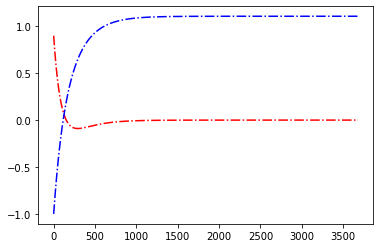

In [103]:
plt.plot(th[:,0],'r-.')
plt.plot(th[:,1],'b-.')
print(th[:,0])
plt.show()

In [78]:
#Grid over which we will calculate J
theta0_vals = np.linspace(-2, 2, 100)
theta1_vals = np.linspace(-2, 3, 100)

#initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.size, theta1_vals.size))

#Fill out J_vals
for t1, element in enumerate(theta0_vals):
    for t2, element2 in enumerate(theta1_vals):
        thetaT = np.zeros(shape=(2, 1))
        thetaT[0][0] = element
        thetaT[1][0] = element2
        J_vals[t1, t2] = cost_function(Xn, yn, thetaT.flatten())

#Contour plot
J_vals = J_vals.T

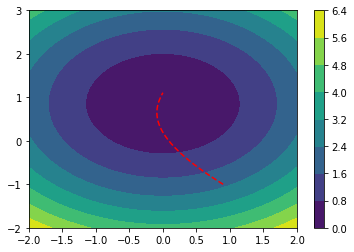

In [79]:
A, B = np.meshgrid(theta0_vals, theta1_vals)
C = J_vals

cp = plt.contourf(A, B, C)
plt.colorbar(cp)
plt.plot(th.T[0],th.T[1],'r--')
plt.show()

In [80]:
#Animation
import matplotlib.animation as animation

#Set the plot up,
fig = plt.figure(figsize=(12,5))

plt.subplot(121)
plt.plot(Xn,yn,'ro', label='Training data')
plt.title('Housing Price Prediction')
plt.axis([Xn.min()-Xn.std(),Xn.max()+Xn.std(),yn.min()-yn.std(),yn.max()+yn.std()])
plt.grid(axis='both')
plt.xlabel("Size of house in ft^2 (X1) ")
plt.ylabel("Price in $1000s (Y)")
plt.legend(loc='lower right')

line, = plt.plot([], [], 'b-', label='Current Hypothesis')
annotation = plt.text(-2, 3,'',fontsize=20,color='green')
annotation.set_animated(True)

plt.subplot(122)
cp = plt.contourf(A, B, C)
plt.colorbar(cp)
plt.title('Filled Contours Plot')
plt.xlabel('theta 0')
plt.ylabel('theta 1')
track, = plt.plot([], [], 'r-')
point, = plt.plot([], [], 'ro')

plt.tight_layout()
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    track.set_data([], [])
    point.set_data([], [])
    annotation.set_text('')
    return line, track, point, annotation

# animation function.  This is called sequentially
def animate(i):
    fit1_X = np.linspace(Xn.min()-Xn.std(), Xn.max()+Xn.std(), 1000)
    fit1_y = th[i][0] + th[i][1]*fit1_X
    
    fit2_X = th.T[0][:i]
    fit2_y = th.T[1][:i]
    
    track.set_data(fit2_X, fit2_y)
    line.set_data(fit1_X, fit1_y)
    point.set_data(th.T[0][i], th.T[1][i])
    
    annotation.set_text('Cost = %.4f' %(ch[i]))
    return line, track, point, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=800, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 30)

MovieWriter stderr:
convert-im6.q16: no images defined `animation.gif' @ error/convert.c/ConvertImageCommand/3258.



CalledProcessError: Command '['convert', '-size', '864x360', '-depth', '8', '-delay', '3.3333333333333335', '-loop', '0', 'rgba:-', 'animation.gif']' returned non-zero exit status 1.

In [ ]:
#Display the animation...
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))